In [14]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data.dataloader import DataLoader

from model import MaskDetectionModel
from dataset import MaskImageDataset
from  transform import mask_image_test_transform
from utils import calc_scores

In [2]:
data = pd.read_csv('output.csv', index_col='epoch')
data

,train_loss,test_loss,train_tp,train_fp,train_fn,train_tn,test_tp,test_fp,test_fn,test_tn
epoch,,,,,,,,,,
1,0.291433,0.187221,9366,561,582,7750,3081,211,209,2585
2,0.172377,0.175522,9493,497,455,7814,3117,196,173,2600
3,0.143203,0.181103,9759,772,189,7539,3202,339,88,2457
4,0.120497,0.126736,9637,203,311,8108,3130,107,160,2689
5,0.100108,0.141359,9768,261,180,8050,3176,157,114,2639
...,...,...,...,...,...,...,...,...,...,...
146,0.023945,0.649250,9945,2,3,8309,3154,143,136,2653
147,0.016529,0.748324,9947,2,1,8309,3172,155,118,2641
148,0.010864,0.758113,9948,0,0,8311,3175,135,115,2661


In [3]:
data['train_f1'] = 2 * data['train_tp'] / (2 * data['train_tp'] + data['train_fp'] + data['train_fn'])
data

,train_loss,test_loss,train_tp,train_fp,train_fn,train_tn,test_tp,test_fp,test_fn,test_tn,train_f1
epoch,,,,,,,,,,,
1,0.291433,0.187221,9366,561,582,7750,3081,211,209,2585,0.942491
2,0.172377,0.175522,9493,497,455,7814,3117,196,173,2600,0.952252
3,0.143203,0.181103,9759,772,189,7539,3202,339,88,2457,0.953074
4,0.120497,0.126736,9637,203,311,8108,3130,107,160,2689,0.974025
5,0.100108,0.141359,9768,261,180,8050,3176,157,114,2639,0.977925
...,...,...,...,...,...,...,...,...,...,...,...
146,0.023945,0.649250,9945,2,3,8309,3154,143,136,2653,0.999749
147,0.016529,0.748324,9947,2,1,8309,3172,155,118,2641,0.999849
148,0.010864,0.758113,9948,0,0,8311,3175,135,115,2661,1.000000


In [4]:
data['test_f1'] = 2 * data['test_tp'] / (2 * data['test_tp'] + data['test_fp'] + data['test_fn'])
data

,train_loss,test_loss,train_tp,train_fp,train_fn,train_tn,test_tp,test_fp,test_fn,test_tn,train_f1,test_f1
epoch,,,,,,,,,,,,
1,0.291433,0.187221,9366,561,582,7750,3081,211,209,2585,0.942491,0.936190
2,0.172377,0.175522,9493,497,455,7814,3117,196,173,2600,0.952252,0.944116
3,0.143203,0.181103,9759,772,189,7539,3202,339,88,2457,0.953074,0.937491
4,0.120497,0.126736,9637,203,311,8108,3130,107,160,2689,0.974025,0.959093
5,0.100108,0.141359,9768,261,180,8050,3176,157,114,2639,0.977925,0.959082
...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.023945,0.649250,9945,2,3,8309,3154,143,136,2653,0.999749,0.957644
147,0.016529,0.748324,9947,2,1,8309,3172,155,118,2641,0.999849,0.958743
148,0.010864,0.758113,9948,0,0,8311,3175,135,115,2661,1.000000,0.962121


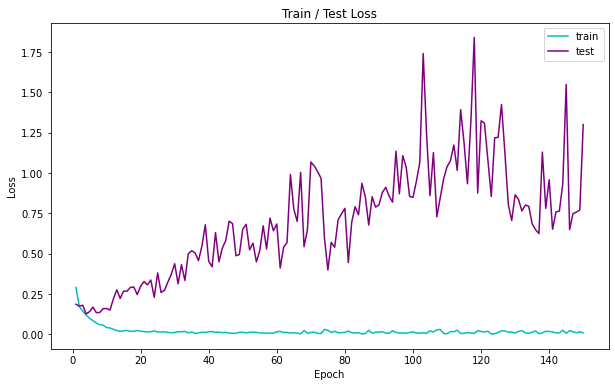

In [5]:
plt.figure(figsize=(10,6))
plt.title('Train / Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(data.index, data['train_loss'], c='c')
plt.plot(data.index, data['test_loss'], c='purple')
plt.legend(['train', 'test'])
plt.show()

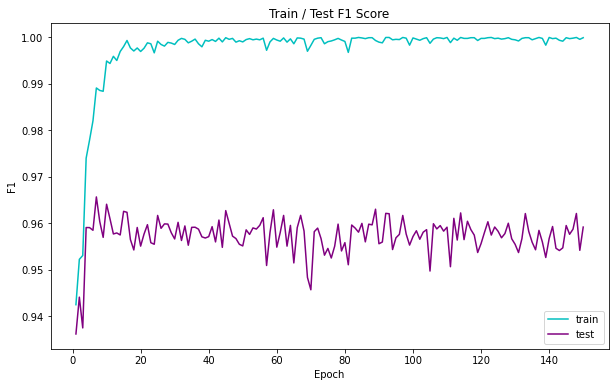

In [6]:
plt.figure(figsize=(10,6))
plt.title('Train / Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.plot(data.index, data['train_f1'], c='c')
plt.plot(data.index, data['test_f1'], c='purple')
plt.legend(['train', 'test'])
plt.show()

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MaskDetectionModel()
model.load_state_dict(torch.load('model.state', map_location=device))

<All keys matched successfully>

In [16]:
data_path = 'data'
train_dataset = MaskImageDataset(os.path.join(data_path, 'train'), transform=mask_image_test_transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=False)

test_dataset = MaskImageDataset(os.path.join(data_path, 'test'), transform=mask_image_test_transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [17]:
test_y_true, test_y_prob = calc_scores(test_loader, model, device)
test_labels = np.array(test_y_true)
test_scores = np.array(test_y_prob[:,1:].flatten())

In [10]:
train_y_true, train_y_prob = calc_scores(train_loader, model, device)
train_labels = np.array(train_y_true)
train_scores = np.array(train_y_prob[:,1:].flatten())

In [18]:
def _roc(labels:np.array, scores:np.array, threshold):
    predicted = 1*(scores >= threshold)

    tp = int(np.logical_and(labels==1, predicted==1).sum())
    fp = int(np.logical_and(labels==0, predicted==1).sum())
    fn = int(np.logical_and(labels==1, predicted==0).sum())
    tn = int(np.logical_and(labels==0, predicted==0).sum())

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return tpr, fpr

In [19]:
thresholds = np.linspace(0,1)

In [20]:
test_tprs, test_fprs = [], []
for t in thresholds:
    tpr, fpr = _roc(test_labels, test_scores,t)
    test_tprs.append(tpr)
    test_fprs.append(fpr)

In [31]:
train_tprs, train_fprs = [], []
for t in thresholds:
    tpr, fpr = _roc(train_labels, train_scores,t)
    train_tprs.append(tpr)
    train_fprs.append(fpr)

In [33]:
def estimate_roc_auc(fprs, tprs):
    S = 0
    for i in range(len(y)-1):
        x1, x2 = fprs[i], fprs[i+1]
        y1, y2 = tprs[i], tprs[i+1]
        S += (x2-x1) * min(y1, y2)
        S += (x2-x1) * (max(y1,y2) - min(y1, y2)) / 2

    return abs(S)

In [35]:
print('Test ROC AUC:')
test_roc_auc = estimate_roc_auc(test_fprs, test_tprs)
test_roc_auc

Test ROC AUC:


0.9619725965447821

In [36]:
print('Train ROC AUC:')
train_roc_auc = estimate_roc_auc(train_fprs, train_tprs)
train_roc_auc

Train ROC AUC:


0.9999996069079125

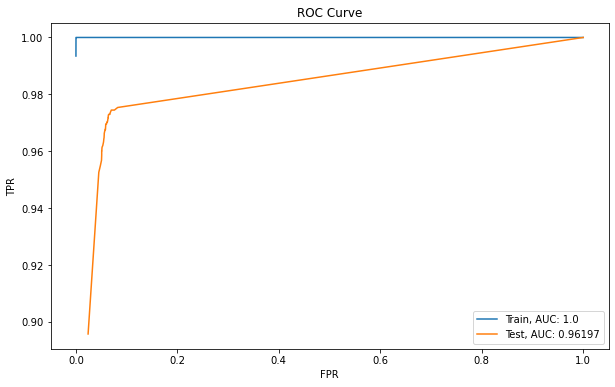

In [38]:
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(train_fprs, train_tprs)
plt.plot(test_fprs, test_tprs)
plt.legend([f'Train, AUC: {train_roc_auc:.5}', f'Test, AUC: {test_roc_auc:.5}'])
plt.show()